# Aula 1 - Análise de Dados com Pandas


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [6]:
df.shape

(133349, 11)

In [7]:
linhas, colunas = df.shape[0], df.shape[1]
print('Linhas:', linhas)
print('Colunas:', colunas)

Linhas: 133349
Colunas: 11


In [8]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

### Renomeando as colunas do DataFrame

In [9]:
# Dicionário de renomeação
novos_nomes = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}

# Aplicando renomeação
df.rename(columns=novos_nomes, inplace=True)

# Verificando resultado
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


### Analisando quais sãos as categorias das colunas categóricas

#### Nível de senioridade

In [10]:
# O método .value_counts() serve para contar quantas vezes cada valor único aparece em uma coluna.
df['senioridade'].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


| Sigla | Significado | Descrição                                 |
|-------|-------------|--------------------------------------------|
| SE    | Senior      | Profissional experiente (nível sênior)     |
| MI    | Mid         | Nível intermediário                        |
| EN    | Entry       | Iniciante ou júnior (entry-level)          |
| EX    | Executive   | Executivo, liderança sênior (C-Level)      |


#### Tipo de contrato

In [11]:
df['contrato'].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


| Sigla | Significado  | Descrição                                                           |
|-------|--------------|----------------------------------------------------------------------|
| FT    | Full-time    | Tempo integral – trabalho padrão de 40h/semana ou período completo   |
| PT    | Part-time    | Meio período – carga horária reduzida                                |
| CT    | Contract     | Contrato temporário ou por projeto – geralmente por prazo determinado|
| FL    | Freelance    | Freelancer – trabalho autônomo ou por demanda, sem vínculo formal    |


#### Regime de trabalho

In [12]:
df['remoto'].value_counts()

,count
remoto,
0,105312
100,27718
50,319


O modelo remoto permite trabalhar de qualquer lugar sem precisar ir à empresa. O modelo presencial exige ir até o escritório todos os dias. O híbrido mistura os dois modelos. O modelo 'everywhere' é mais raro e permite trabalhar de qualquer lugar do mundo sem restrição de país ou cidade.

| Sigla | Significado |
|-------|-------------|
| 0     | Presencial  |
| 100   | Remoto      |
| 50    | Híbrido     |

#### Tamanho da empresa

In [13]:
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
M,129561
L,3574
S,214


| Sigla | Significado  | Descrição                                                           |
|-------|--------------|----------------------------------------------------------------------|
| M   | Medium    | Empresa de tamanho médio|
| L    | Large    | Empresa de tamanho grande                                |
| S    | Small    | Empresa de tamanho pequeno|


### Modificando o nome das categorias:

In [14]:
senioridade = {
    'SE': 'senior',
    'MI': 'pleno',
    'EN': 'junior',
    'EX': 'executivo'
}
df['senioridade'] = df['senioridade'].replace(senioridade)
df['senioridade'].value_counts()

,count
senioridade,
senior,77241
pleno,40465
junior,12443
executivo,3200


In [15]:
contrato = {
    'FT': 'integral',
    'PT': 'parcial',
    'CT': 'contrato',
    'FL': 'freelancer'
}
df['contrato'] = df['contrato'].replace(contrato)
df['contrato'].value_counts()

,count
contrato,
integral,132563
contrato,394
parcial,376
freelancer,16


In [16]:
tamanho_empresa = {
    'L': 'grande',
    'S': 'pequena',
    'M':	'media'

}
df['tamanho_empresa'] = df['tamanho_empresa'].replace(tamanho_empresa)
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
media,129561
grande,3574
pequena,214


In [17]:
mapa_trabalho = {
    0: 'presencial',
    100: 'remoto',
    50: 'hibrido'
}

df['remoto'] = df['remoto'].replace(mapa_trabalho)
df['remoto'].value_counts()

,count
remoto,
presencial,105312
remoto,27718
hibrido,319


In [18]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025.0,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025.0,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025.0,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025.0,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


Podemos também resumir as informações categóricas com o método `describe()`, exibindo a quantidade de categorias únicas, qual é categoria mais frequente e sua respectiva frequência:

In [19]:
df.describe(include='object')

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,senior,integral,Data Scientist,USD,US,presencial,US,media
freq,77241,132563,17314,126140,119579,105312,119641,129561


Com isso já conseguimos responder algumas perguntas, como:

* Qual o nível de experiência mais comum na base de dados?
* Qual é o tipo de contrato mais frequente?
* Qual o cargo mais frequente na amostra?
* De qual país são a maioria dos profissionais da base?
* Qual é o país onde mais empresas da amostra estão sediadas?
* Qual o regime de trabalho mais comum?
* Qual é o tamanho mais comum das empresas na amostra?

**O código é um passo a passo para entender, limpar e preparar a base de dados para análises mais profundas, facilitando a visualização de padrões e tendências no mercado de trabalho em ciência de dados.**

# Aula 2 - Preparação e limpeza dos Dados


In [20]:
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [21]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025.0,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025.0,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025.0,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025.0,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


In [22]:
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [23]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

Sem ano defenido na base de dados fazendo processo de limpeza null

In [24]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,senior,integral,Product Manager,184500,USD,184500,US,presencial,US,media
59692,NaN,pleno,integral,Engineer,110000,USD,110000,DE,presencial,DE,media
59710,NaN,junior,integral,Data Scientist,208800,USD,208800,US,presencial,US,media
59759,NaN,senior,integral,Software Engineer,135000,USD,135000,US,presencial,US,media
59789,NaN,senior,integral,Engineer,112000,USD,112000,US,presencial,US,media
131000,NaN,senior,integral,Machine Learning Engineer,163800,USD,163800,US,presencial,US,media
131006,NaN,senior,integral,Data Analytics Manager,204500,USD,204500,US,presencial,US,media
133054,NaN,junior,integral,Data Scientist,40000,USD,40000,JP,remoto,MY,grande
133281,NaN,pleno,integral,Machine Learning Engineer,180000,PLN,46597,PL,remoto,PL,grande
133317,NaN,pleno,integral,Data Scientist,130000,USD,130000,US,hibrido,US,grande


In [25]:
import numpy as np

#criação de um dataframe de teste para exemplo
df_salarios = pd.DataFrame({
    'nome': ["Ana", "Bruno", "Carlos", "Daniele", "Val"],
    'Salario': [4000, np.nan, 5000, np.nan, 100000]
})

#Calcula a média salarial e substitui os nulos pela média e arrendonda os valores
df_salarios['salario_media'] = df_salarios['Salario'].fillna(df_salarios['Salario'].mean().round(2))

#Calcula mediana e substitui os nulos pela mediana

df_salarios['salario_mediana'] = df_salarios['Salario'].fillna(df_salarios['Salario'].median())

df_salarios

,nome,Salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniele,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


In [26]:
df_temperaturas = pd.DataFrame({
    "Dia": ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"],
    "Temperatura": [30, np.nan, np.nan, 28,27]
})

df_temperaturas["preenchido_ffill"] = df_temperaturas["Temperatura"].ffill()
df_temperaturas

,Dia,Temperatura,preenchido_ffill
0,Segunda,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,NaN,30.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [27]:
df_temperaturas = pd.DataFrame({
    "Dia": ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"],
    "Temperatura": [30, np.nan, np.nan, 28,27]
})

df_temperaturas["preenchido_bfill"] = df_temperaturas["Temperatura"].bfill()
df_temperaturas

,Dia,Temperatura,preenchido_bfill
0,Segunda,30.0,30.0
1,Terça,NaN,28.0
2,Quarta,NaN,28.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [28]:
df_cidades = pd.DataFrame({
    'nome': ["Ana", "Bruno", "Carlos", "Daniele", "Val"],
    'Cidade': ["São Paulo", np.nan, "Curitiba", np.nan, "Belém"]
})

df_cidades['cidade_preenchida'] = df_cidades["Cidade"].fillna("Não informado")
display(df_cidades)

,nome,Cidade,cidade_preenchida
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Não informado
2,Carlos,Curitiba,Curitiba
3,Daniele,NaN,Não informado
4,Val,Belém,Belém


In [29]:
df_limpo = df.dropna()

In [30]:
df_limpo.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [31]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025.0,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025.0,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025.0,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025.0,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


Análise de variaveis do Dataframe

In [32]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [33]:
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('int64'))

# Aula 3 - Visualização de Dados


Aprendendo a criar gráficos estatísticos para explorar e comunicar informações presentes nos dados, Histogramas, boxplots, barras

In [34]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


<Axes: title={'center': 'Distribuição de Cargos'}, xlabel='senioridade'>

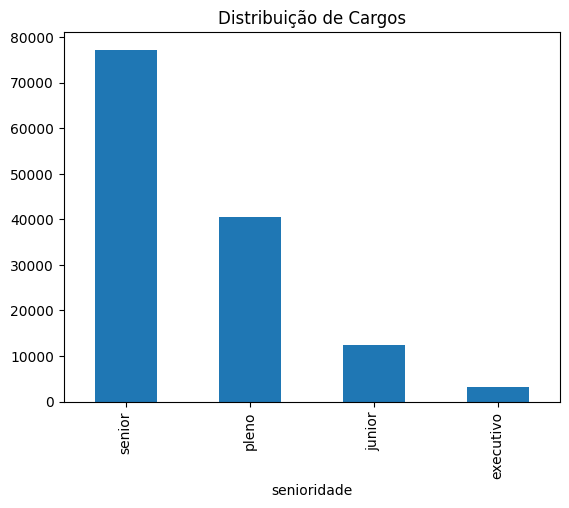

In [35]:
df_limpo['senioridade'].value_counts().plot(kind='bar', title="Distribuição de Cargos")

In [36]:
import seaborn as sns

importação de biblioteca para assim deixar os gráficos mais robusto

<Axes: xlabel='senioridade', ylabel='usd'>

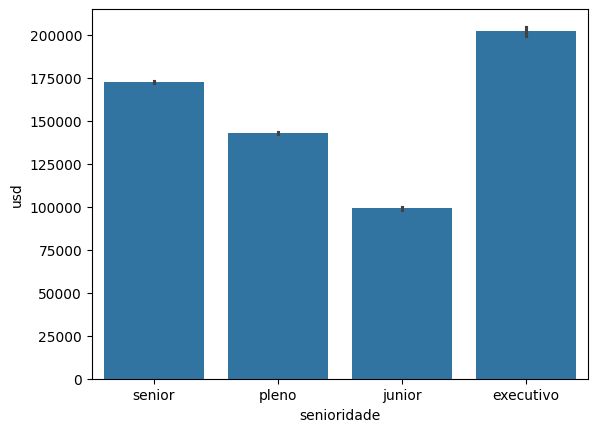

In [37]:
sns.barplot(data=df_limpo, x='senioridade', y='usd')

Análise de dados para saber o sálario da senioridade de modo anual em dolares

In [38]:
import matplotlib.pyplot as plt

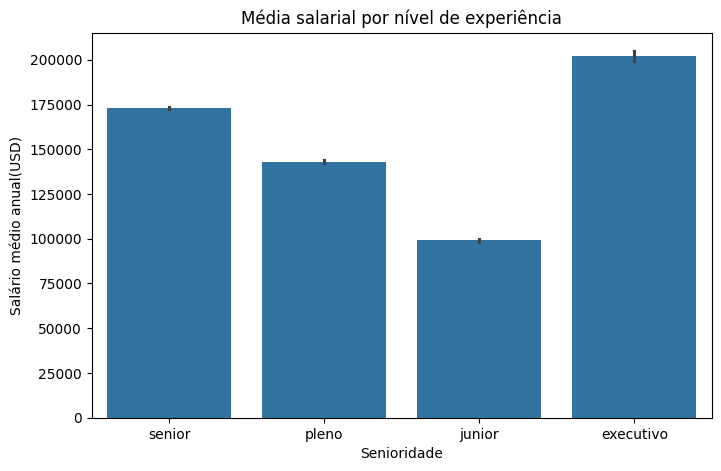

In [39]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_limpo, x='senioridade', y='usd')
plt.title('Média salarial por nível de experiência')
plt.xlabel('Senioridade')
plt.ylabel('Salário médio anual(USD)')
plt.show()

In [40]:
df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False)

,usd
senioridade,
executivo,202027.667813
senior,172850.838301
pleno,143044.845979
junior,99034.963267


Criação de variavel crescente para ordenar a senioridade

In [41]:
ordem = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).index

In [42]:
ordem

Index(['executivo', 'senior', 'pleno', 'junior'], dtype='object', name='senioridade')

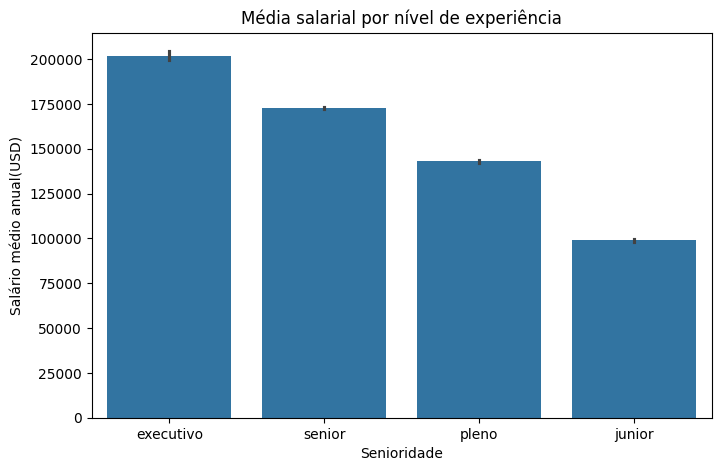

In [43]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_limpo, x='senioridade', y='usd', order=ordem)
plt.title('Média salarial por nível de experiência')
plt.xlabel('Senioridade')
plt.ylabel('Salário médio anual(USD)')
plt.show()

Variavel decrescente de nível do cargo

In [44]:
menor = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=True).index

In [45]:
menor

Index(['junior', 'pleno', 'senior', 'executivo'], dtype='object', name='senioridade')

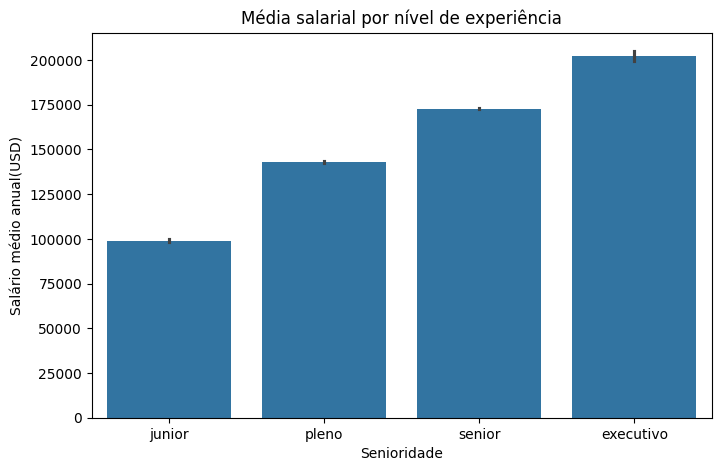

In [46]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_limpo, x='senioridade', y='usd', order=menor)
plt.title('Média salarial por nível de experiência')
plt.xlabel('Senioridade')
plt.ylabel('Salário médio anual(USD)')
plt.show()

Gráfico Histograma com Distribuição Salarial Anuais

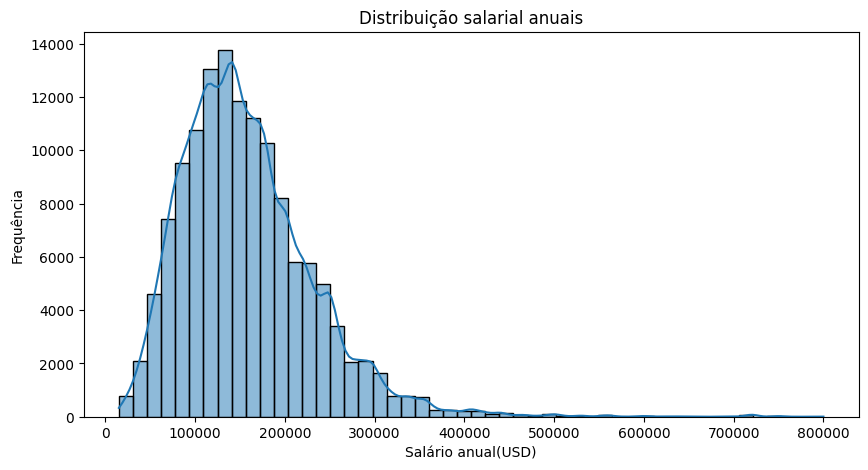

In [47]:
plt.figure(figsize=(10, 5))
sns.histplot(df_limpo['usd'], bins = 50, kde=True)
plt.title('Distribuição salarial anuais')
plt.xlabel('Salário anual(USD)')
plt.ylabel('Frequência')
plt.show()

# Gráfico boxplot em relação ao salário anual USD

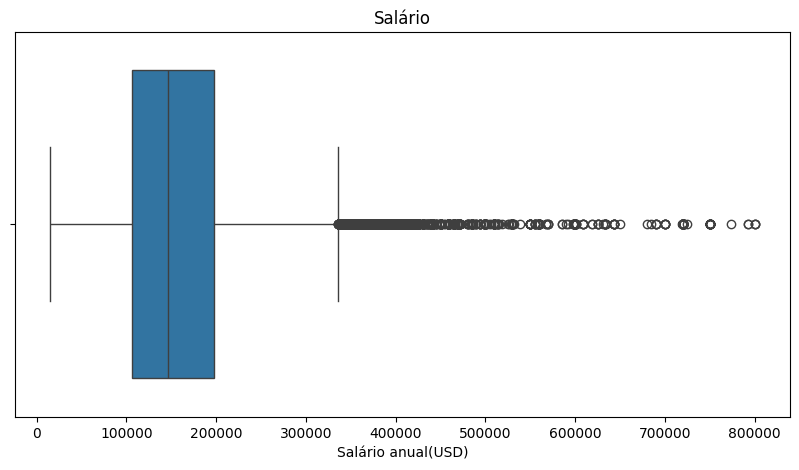

In [48]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_limpo['usd'])
plt.title('Salário')
plt.xlabel('Salário anual(USD)')
plt.show()

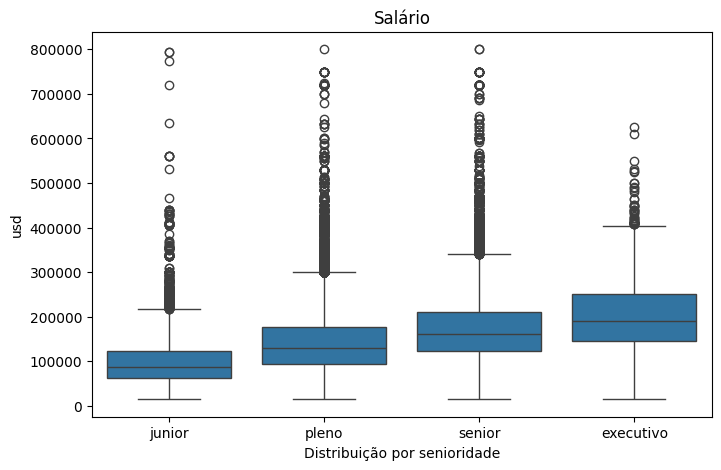

In [49]:
ordem_senioridade = ['junior', 'pleno', 'senior', 'executivo']

plt.figure(figsize=(8, 5))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade)
plt.title('Salário')
plt.xlabel('Distribuição por senioridade')
plt.show()

# Gráfico com diferença senioridade

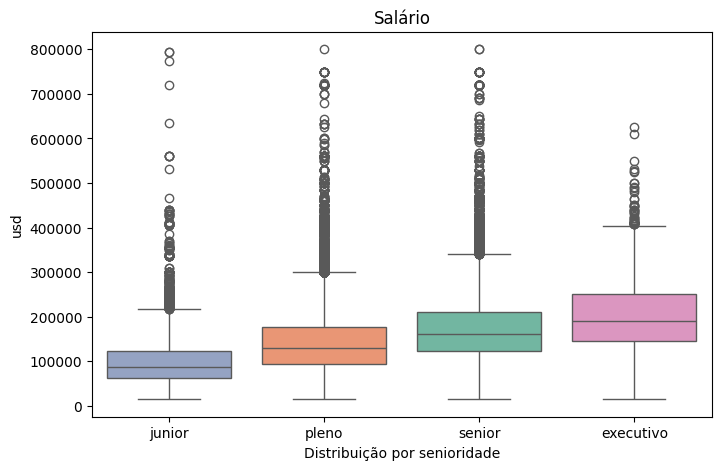

In [50]:
ordem_senioridade = ['junior', 'pleno', 'senior', 'executivo']

plt.figure(figsize=(8, 5))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade, palette='Set2', hue='senioridade')
plt.title('Salário')
plt.xlabel('Distribuição por senioridade')
plt.show()

In [51]:
import plotly.express as px

# Gráfico dinâmico Salarial senioridade

In [52]:
df_media_salarial_senioridade = df_limpo.groupby('senioridade')['usd'].mean().reset_index().sort_values(by='usd', ascending=False)

fig = px.bar(
    df_media_salarial_senioridade,
    x='senioridade',
    y='usd',
    title='Média Salarial por Nível de Senioridade (USD)',
    labels={'senioridade': 'Nível de Senioridade', 'usd': 'Salário Médio Anual (USD)'},
    color='senioridade', # Optional: color bars by seniority level
    text='usd' # Optional: display average salary on bars
)

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside') # Format text on bars
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide') # Adjust text layout
fig.show()

Gráfico de Pizza para Proporção de trabalho

In [53]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho'
             )

fig.show()

# Gráfico de Rosca

In [54]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values = 'quantidade',
             title = 'Proporção dos tipos de trabalho',
             hole = 0.5
             )
fig.update_traces(textinfo='percent+label')
fig.show()

# Gráfico média salarial

In [55]:
# Filtrar o DataFrame para o cargo de 'Data Scientist'
df_data_scientist = df_limpo[df_limpo['cargo'] == 'Data Scientist']

# Agrupar por país de residência e calcular a média salarial
df_salario_por_pais = df_data_scientist.groupby('residencia')['usd'].mean().reset_index()

# Ordenar os resultados pela média salarial de forma descendente
df_salario_por_pais = df_salario_por_pais.sort_values(by='usd', ascending=False)

# Criar o gráfico de barras com Plotly Express
fig = px.bar(
    df_salario_por_pais,
    x='residencia',
    y='usd',
    title='Média Salarial para Data Scientists por País de Residência',
    labels={'residencia': 'País de Residência', 'usd': 'Salário Médio Anual (USD)'},
    color='residencia' # Colore as barras por país
)

# Personalizar o layout do gráfico
fig.update_layout(
    xaxis_title='País de Residência',
    yaxis_title='Salário Médio Anual (USD)',
    xaxis={'categoryorder':'total descending'}
)

fig.show()

# Top 10 países

In [56]:
df_top_10_paises_salario = df_limpo.groupby('residencia')['usd'].mean().sort_values(ascending=False).head(10).reset_index()
display(df_top_10_paises_salario)

,residencia,usd
0,QA,300000.000000
1,CD,275000.000000
2,VE,192500.000000
3,US,163881.383744
4,CZ,154895.833333
5,IL,147321.733333
6,SA,139999.333333
7,PR,134400.000000
8,CA,129880.192822
9,AU,129563.994197


**Reasoning**:
Now that the `df_top_10_paises_salario` DataFrame is prepared with the top 10 countries by average salary, I will create an interactive bar chart using Plotly Express to visualize this data, as requested in the main task.



In [57]:
fig = px.bar(
    df_top_10_paises_salario,
    x='residencia',
    y='usd',
    title='Média Salarial Anual (USD) nos Top 10 Países por Residência',
    labels={'residencia': 'País de Residência', 'usd': 'Salário Médio Anual (USD)'},
    color='residencia', # Color bars by country
    text='usd' # Display average salary on bars
)

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside') # Format text on bars
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide') # Adjust text layout
fig.show()

# Resumo:

Principais Descobertas da Análise de Dados
Foram identificados os 10 países com os maiores salários médios anuais (em USD).
O Catar (QA) lidera com um salário médio anual de US$ 300.000.
 A República Democrática do Congo (CD) vem em seguida, com um salário médio anual de US$$ 300.000.  

A Venezuela (VE) ocupa o terceiro lugar, com um salário médio anual de US$ 192.500.

Um gráfico de barras interativo foi gerado com sucesso, visualizando esses 10 principais países e seus respectivos salários médios, ordenados de forma decrescente.

# Insights ou Próximos Passos

Investigar os fatores que contribuem para esses salários médios excepcionalmente altos nos países identificados como os principais, pois eles podem representar funções de nicho ou condições econômicas específicas.
Expandir a análise para incluir outros atributos demográficos ou profissionais para entender se certas funções de trabalho ou níveis de experiência estão impulsionando essas altas médias nos principais países.